# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [ ]:
vehicles.pivot_table(index=["Vehicle Class"])

vehicles.pivot_table(index=["Vehicle Class"], columns=["Cylinders"])

vehicles.pivot_table(index=["Vehicle Class"], values=["Combined MPG"], aggfunc=np.sum)

vehicles.pivot_table(index=["Vehicle Class"], values=["Combined MPG", "CO2 Emission Grams/Mile"])

vehicles.pivot_table(index=["Vehicle Class"], columns=["Cylinders"], values=["Combined MPG"], fill_value=0)

In [30]:
# Libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [3]:
# your code here
driver   = 'mysql+pymysql:'
user     = 'root'
password = 'Ironhack12'
ip       = '127.0.0.1'
database = 'employees'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [5]:
pd.read_sql('SHOW TABLES;', engine)
employees=pd.read_sql('SELECT * FROM employees', engine)


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [16]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [13]:
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [34]:

#vehicles.pivot_table(index=["Vehicle Class"], columns=["Cylinders"])

#vehicles.pivot_table(index=["Vehicle Class"], values=["Combined MPG"], aggfunc=np.sum)

#vehicles.pivot_table(index=["Vehicle Class"], values=["Combined MPG", "CO2 Emission Grams/Mile"])

#vehicles.pivot_table(index=["Vehicle Class"], columns=["Cylinders"], values=["Combined MPG"], fill_value=0)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [37]:
# Method 1
# your code here
employees.groupby('Department').agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [39]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values=["Salary"], aggfunc={"Salary":np.mean})



,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [41]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc={"Salary":np.mean})


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [42]:
# your code here
employees.pivot_table(index=["Title"], values=["Years","Salary"])


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [50]:
# your code here
employees.pivot_table(index=["Title"], values=["Salary","Department"], aggfunc={"Salary":"mean","Department":"count"})


,Department,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [58]:
# your code here
employees.pivot_table(index=['Department','Title'], values='Salary', aggfunc= [np.mean, np.median, min, max, np.std])

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

In [ ]:
"""
there are missing values as there is no std because there is only one value
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [63]:
# your code here
employees.pivot_table(index=['Department','Title'], values='Salary', aggfunc= [np.mean, np.median, min, max, np.std], fill_value= 0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [68]:
# your code here
employees.pivot_table(index=['Department'], values=['Title','Salary'], aggfunc={'Title':'count', 'Salary':'sum'})

,Salary,Title
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [69]:
# your code here
employees.pivot_table(index=['Department','Title'], values=['Years','Salary'], aggfunc={'Years':'sum', 'Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [70]:
# your code here
driver   = 'mysql+pymysql:'
user     = 'root'
password = 'Ironhack12'
ip       = '127.0.0.1'
database = 'fitbit'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [72]:
fitbit=pd.read_sql('SELECT * FROM fitbit',engine)

In [74]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [91]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                   object
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes      object
dtype: object

In [90]:
fitbit=fitbit.astype({'Minutes Sedentary':'float'})

In [92]:
fitbit.describe()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185
std,916.307036,5594.836225,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622
min,179.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000
50%,2974.000000,10413.000000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000
75%,3233.000000,13916.500000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000
max,4351.000000,26444.000000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000


In [82]:
fitbit.isnull().count()

Date                      367
Calorie burned            367
Steps                     367
Distance                  367
Floors                    367
Minutes Sedentary         367
Minutes Lightly Active    367
Minutes Fairly Active     367
Minutes Very Active       367
Activity Calories         367
MinutesOfSleep            367
MinutesOfBeingAwake       367
NumberOfAwakings          367
LengthOfRestInMinutes     367
dtype: int64

In [83]:
fitbit.shape

(367, 14)

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [84]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [85]:
import matplotlib.pyplot as plt;

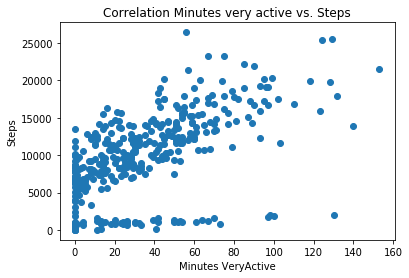

In [86]:
x=fitbit['Minutes Very Active']
y=fitbit['Steps']
plt.scatter(x, y)
plt.title('Correlation Minutes very active vs. Steps')
plt.xlabel('Minutes VeryActive')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [99]:
"""
a lot of people are not very active but still achieve around 10000 steps
"""

'\na lot of people are not very active but still achieve around 10000 steps\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [93]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

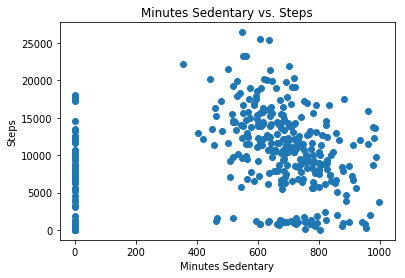

In [94]:
# your code here
x=fitbit['Minutes Sedentary']
y=fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes Sedentary vs. Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [98]:
"""
there is almost no correlation between the two.
"""

'\nthere is almost no correlation between the two.\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [95]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

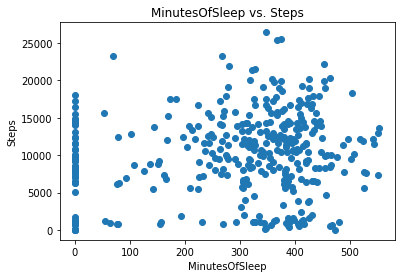

In [96]:
# your code here
x=fitbit['MinutesOfSleep']
y=fitbit['Steps']
plt.scatter(x, y)
plt.title('MinutesOfSleep vs. Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [97]:
"""
also a very weak correlation
"""

'\nalso a very weak correlation\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [104]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
fitbit_cor=fitbit[columns]
cor_fit=fitbit.corr()

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [110]:
# your code here
cor_fit['Steps'].sort_values(ascending=False)

Steps                     1.000000
Minutes Very Active       0.571452
Minutes Lightly Active    0.393010
Floors                    0.306511
Minutes Fairly Active     0.303244
Calorie burned            0.255305
MinutesOfSleep            0.130986
MinutesOfBeingAwake       0.124846
NumberOfAwakings          0.106591
Minutes Sedentary         0.076906
Activity Calories        -0.160568
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [111]:
# your code here
driver   = 'mysql+pymysql:'
user     = 'root'
password = 'Ironhack12'
ip       = '127.0.0.1'
database = 'time_grades'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)


In [113]:
tg=pd.read_sql('SELECT* FROM time_grades', engine)

#### Show visually the frequency distribution of the `time_grades` dataset.

In [117]:
# your code here
tg['Grade']=tg['Grade'].apply(lambda x:x.replace('\r',''))

In [121]:
tg=tg.astype({'Grade':'int64'})

In [122]:
tg.dtypes

Name          object
Study time     int64
Grade          int64
dtype: object

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [124]:
# your code here
tg['Study time'].corr(tg['Grade'],method="pearson")

0.7980456073578858

In [125]:
tg['Study time'].corr(tg['Grade'],method="spearman")

0.819658753036942

In [126]:
"""
According to Spearman there is a very strong correlation 
According to Pearson there is also a high correlation
"""

'\nAccording to Spearman there is a very strong correlation \nAccording to Pearson there is also a high correlation\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

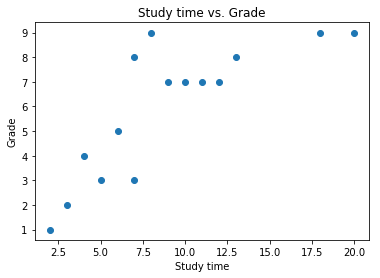

In [128]:
# your code here
x=tg['Study time']
y=tg['Grade']
plt.scatter(x, y)
plt.title('Study time vs. Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [129]:
"""
you can see the correlation between the two: the higher the study time the better the grades
"""

'\nyou can see the correlation between the two: the higher the study time the better the grades\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [127]:
"""
The difference between the Pearson correlation and the Spearman correlation is that the Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for measurements taken from ordinal scales
"""

'\nThe difference between the Pearson correlation and the Spearman correlation is that the Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for measurements taken from ordinal scales\n'